# Google Analytics Customer Revenue Prediction

* Data Exploration
* 2018.09.17 ~

## 1. Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
%matplotlib inline

## 2. Data Loading

In [7]:
train=pd.read_csv('../data/train_featured.csv')
test=pd.read_csv('../data/test_featured.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 3. Feature Exploration

### Data Fields
* fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
* channelGrouping - The channel via which the user came to the Store.
* date - The date on which the user visited the Store.
* device - The specifications for the device used to access the Store.
* geoNetwork - This section contains information about the geography of the user.
* sessionId - A unique identifier for this visit to the store.
* socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
* totals - This section contains aggregate values across the session.
* trafficSource - This section contains information about the Traffic Source from which the session originated.
* visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you *  should use a combination of fullVisitorId and visitId.
* visitNumber - The session number for this user. If this is the first session, then this is set to 1.
* visitStartTime - The timestamp (expressed as POSIX time).

In [8]:
train.head()

,Unnamed: 0,fullVisitorId,sessionId,visitId,visitNumber,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,...,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,device.deviceCategory_desktop,device.deviceCategory_mobile,device.deviceCategory_tablet
0,0,1131660440785968503,1131660440785968503_1472830385,1472830385,1.0,1.0,1.0,1.0,1.0,NaN,...,0,0,0,1,0,0,0,1,0,0
1,1,377306020877927890,377306020877927890_1472880147,1472880147,1.0,1.0,1.0,1.0,1.0,NaN,...,0,0,0,1,0,0,0,1,0,0
2,2,3895546263509774583,3895546263509774583_1472865386,1472865386,1.0,1.0,1.0,1.0,1.0,NaN,...,0,0,0,1,0,0,0,1,0,0
3,3,4763447161404445595,4763447161404445595_1472881213,1472881213,1.0,1.0,1.0,1.0,1.0,NaN,...,0,0,0,1,0,0,0,1,0,0
4,4,27294437909732085,27294437909732085_1472822600,1472822600,2.0,1.0,1.0,NaN,1.0,NaN,...,0,0,0,1,0,0,0,0,1,0


In [10]:
test.head()

,Unnamed: 0,fullVisitorId,sessionId,visitId,visitNumber,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.visits,...,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,device.deviceCategory_desktop,device.deviceCategory_mobile,device.deviceCategory_tablet
0,0,6167871330617112363,6167871330617112363_1508151024,1508151024,2.0,NaN,4.0,NaN,4.0,1.0,...,0,0,0,1,0,0,0,1,0,0
1,1,0643697640977915618,0643697640977915618_1508175522,1508175522,1.0,NaN,5.0,1.0,5.0,1.0,...,0,0,0,1,0,0,0,1,0,0
2,2,6059383810968229466,6059383810968229466_1508143220,1508143220,1.0,NaN,7.0,1.0,7.0,1.0,...,0,0,0,1,0,0,0,1,0,0
3,3,2376720078563423631,2376720078563423631_1508193530,1508193530,1.0,NaN,8.0,1.0,4.0,1.0,...,0,0,0,1,0,0,0,0,1,0
4,4,2314544520795440038,2314544520795440038_1508217442,1508217442,1.0,NaN,9.0,1.0,4.0,1.0,...,0,0,0,1,0,0,0,1,0,0


In [16]:
train=train.iloc[:, 1:]

In [17]:
test=test.iloc[:, 1:]

In [18]:
train.head()

,fullVisitorId,sessionId,visitId,visitNumber,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,...,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,device.deviceCategory_desktop,device.deviceCategory_mobile,device.deviceCategory_tablet
0,1131660440785968503,1131660440785968503_1472830385,1472830385,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,0,0,0,1,0,0,0,1,0,0
1,377306020877927890,377306020877927890_1472880147,1472880147,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,0,0,0,1,0,0,0,1,0,0
2,3895546263509774583,3895546263509774583_1472865386,1472865386,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,0,0,0,1,0,0,0,1,0,0
3,4763447161404445595,4763447161404445595_1472881213,1472881213,1.0,1.0,1.0,1.0,1.0,NaN,1.0,...,0,0,0,1,0,0,0,1,0,0
4,27294437909732085,27294437909732085_1472822600,1472822600,2.0,1.0,1.0,NaN,1.0,NaN,1.0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
drop_ID=["sessionId",'visitId']
train = train.drop(drop_ID, axis =1)
test =test.drop(drop_ID, axis =1)

In [83]:
train.isnull().sum()

fullVisitorId                                                   0
visitNumber                                                     0
totals.bounces                                                  0
totals.hits                                                     0
totals.newVisits                                                0
totals.pageviews                                                0
totals.transactionRevenue                                       0
totals.visits                                                   0
trafficSource.campaign                                          0
trafficSource.keyword                                           0
year                                                            0
month                                                           0
day                                                             0
week                                                            0
trafficSource.adwordsClickInfo.adNetworkType_Google Search      0
trafficSou

In [24]:
test.isnull().sum()

fullVisitorId                                                        0
visitNumber                                                          0
totals.bounces                                                  383736
totals.hits                                                          0
totals.newVisits                                                200314
totals.pageviews                                                   139
totals.visits                                                        0
trafficSource.campaign                                               0
trafficSource.keyword                                                0
year                                                                 0
month                                                                0
day                                                                  0
week                                                                 0
trafficSource.adwordsClickInfo.adNetworkType_Content                 0
traffi

In [30]:
train['totals.bounces'] = train['totals.bounces'].fillna(0)

In [34]:
train['totals.newVisits'] = train['totals.newVisits'].fillna(0)

In [78]:
train['totals.pageviews']=train['totals.pageviews'].fillna(0)

In [81]:
train['totals.transactionRevenue']=train['totals.transactionRevenue'].fillna(0)

In [82]:
train.isnull().sum()

fullVisitorId                                                   0
visitNumber                                                     0
totals.bounces                                                  0
totals.hits                                                     0
totals.newVisits                                                0
totals.pageviews                                                0
totals.transactionRevenue                                       0
totals.visits                                                   0
trafficSource.campaign                                          0
trafficSource.keyword                                           0
year                                                            0
month                                                           0
day                                                             0
week                                                            0
trafficSource.adwordsClickInfo.adNetworkType_Google Search      0
trafficSou

In [84]:
test['totals.bounces'] = test['totals.bounces'].fillna(0)
test['totals.newVisits'] = test['totals.newVisits'].fillna(0)
test['totals.pageviews']=test['totals.pageviews'].fillna(0)

In [85]:
train.head()

,fullVisitorId,visitNumber,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.campaign,trafficSource.keyword,...,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,device.deviceCategory_desktop,device.deviceCategory_mobile,device.deviceCategory_tablet
0,1131660440785968503,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,377306020877927890,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,3895546263509774583,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,4763447161404445595,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,27294437909732085,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0,0,...,0,0,0,1,0,0,0,0,1,0


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


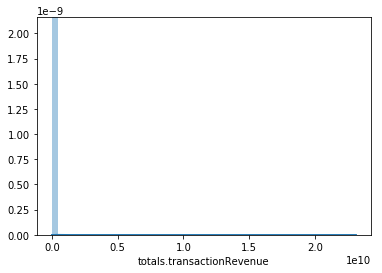

In [86]:
sns.distplot(train['totals.transactionRevenue'])

In [92]:
train_1=train['totals.transactionRevenue'].loc[train['totals.transactionRevenue']>0]

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


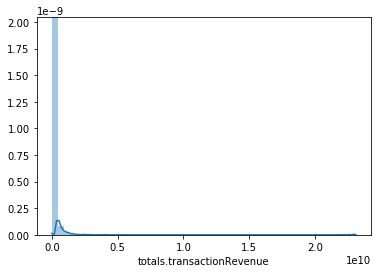

In [93]:
sns.distplot(train_1)

In [105]:
group_train=train.groupby(['fullVisitorId']).sum()

In [108]:
corr=group_train.corr()

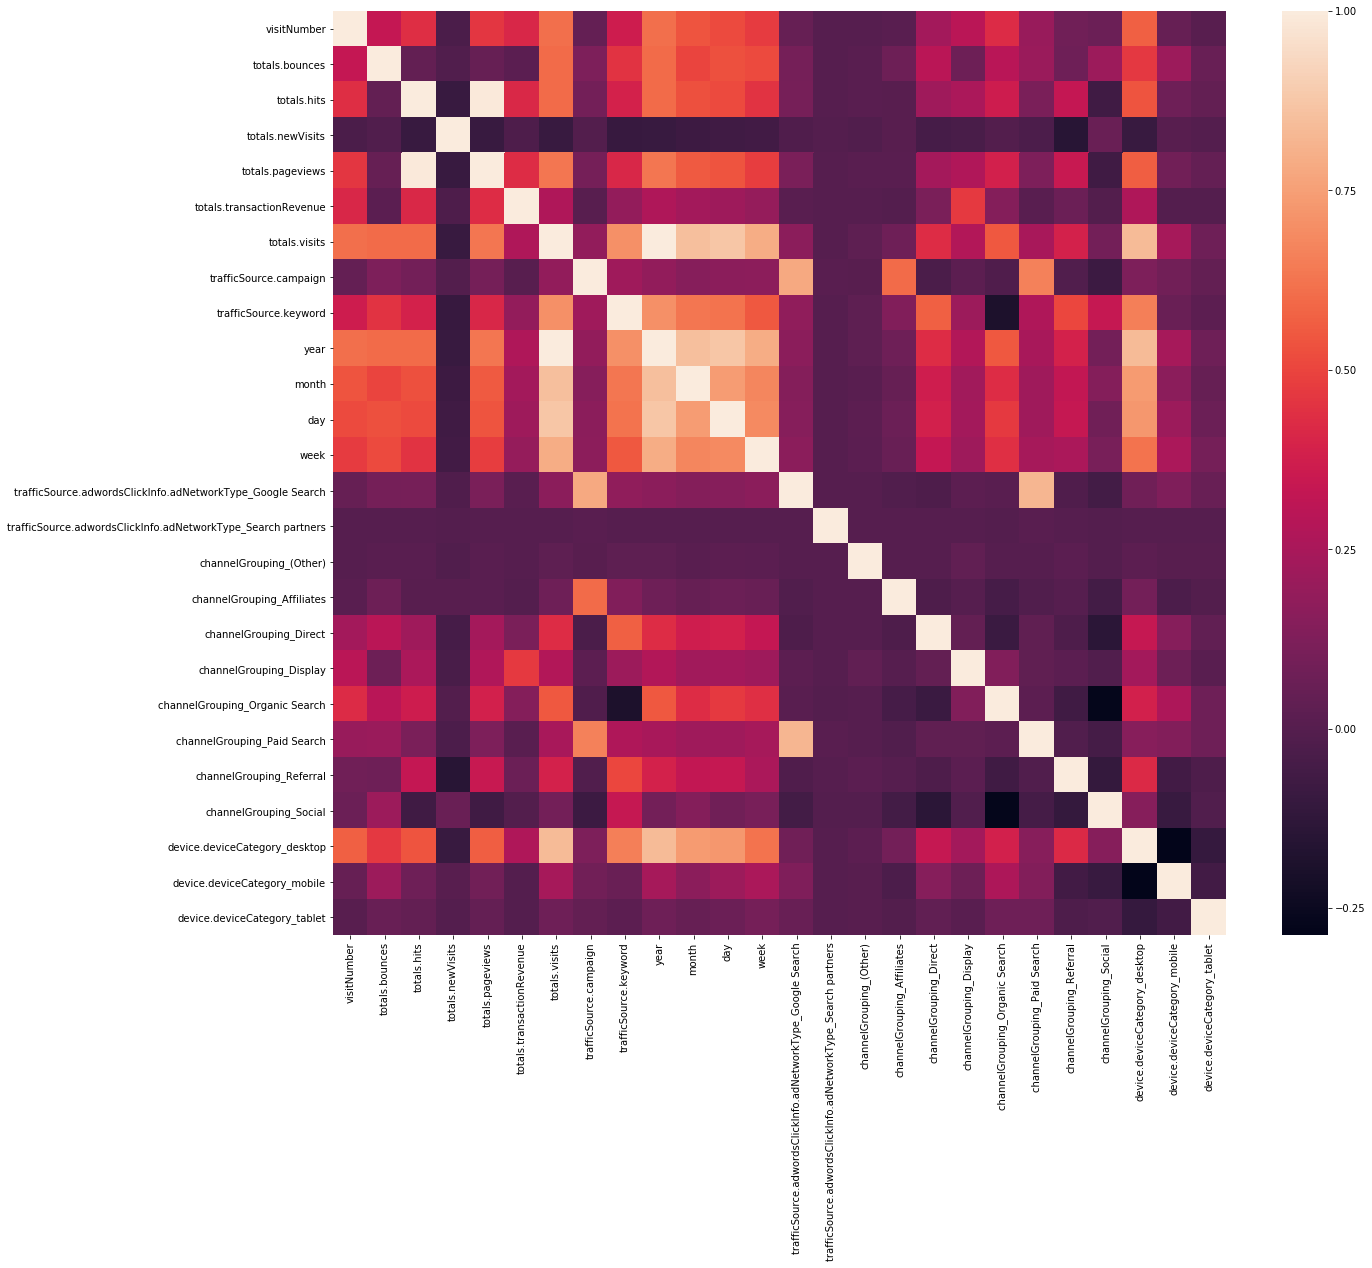

In [115]:
fig, ax1 = plt.subplots()
fig.set_size_inches(20,17)
sns.heatmap(corr, ax=ax1)

In [119]:
corr.sort_values(by='totals.transactionRevenue', ascending=False)

,visitNumber,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.campaign,trafficSource.keyword,year,...,channelGrouping_Affiliates,channelGrouping_Direct,channelGrouping_Display,channelGrouping_Organic Search,channelGrouping_Paid Search,channelGrouping_Referral,channelGrouping_Social,device.deviceCategory_desktop,device.deviceCategory_mobile,device.deviceCategory_tablet
totals.transactionRevenue,0.410711,0.016639,0.414035,-0.021347,0.428186,1.000000,0.269436,0.007758,0.187528,0.269435,...,-0.002125,0.112399,0.470344,0.144295,0.009536,0.064698,-0.010309,0.267045,-0.003358,-0.001595
channelGrouping_Display,0.304237,0.069740,0.256455,-0.040969,0.273633,0.470344,0.279091,0.020777,0.213406,0.279098,...,-0.000052,0.043238,1.000000,0.131253,0.030243,0.015448,-0.012875,0.233877,0.070635,0.011766
totals.pageviews,0.461323,0.052965,0.990495,-0.094672,1.000000,0.428186,0.630578,0.096236,0.409363,0.630561,...,0.010616,0.236262,0.273633,0.383842,0.120913,0.344904,-0.070402,0.563548,0.085907,0.047631
totals.hits,0.435269,0.042660,1.000000,-0.092352,0.990495,0.414035,0.598572,0.090514,0.389015,0.598553,...,0.009140,0.223322,0.256455,0.364066,0.113504,0.334739,-0.071182,0.538104,0.076479,0.043186
visitNumber,1.000000,0.332762,0.435269,-0.033873,0.461323,0.410711,0.612292,0.048331,0.363368,0.612267,...,0.009290,0.232219,0.304237,0.425114,0.201963,0.080212,0.066027,0.571735,0.053181,0.007647
totals.visits,0.612292,0.600827,0.598572,-0.092350,0.630578,0.269436,1.000000,0.182829,0.703760,1.000000,...,0.077620,0.430301,0.279091,0.548203,0.247861,0.386433,0.094332,0.836893,0.241243,0.077058
year,0.612267,0.600836,0.598553,-0.092345,0.630561,0.269435,1.000000,0.182841,0.703740,1.000000,...,0.077629,0.430302,0.279098,0.548228,0.247855,0.386437,0.094282,0.836874,0.241274,0.077066
device.deviceCategory_desktop,0.571735,0.462951,0.538104,-0.094522,0.563548,0.267045,0.836893,0.124041,0.654684,0.836874,...,0.092931,0.336886,0.233877,0.381491,0.154304,0.420749,0.145204,1.000000,-0.287515,-0.105332
month,0.541736,0.499865,0.529649,-0.080422,0.554658,0.232491,0.852354,0.148058,0.630545,0.852215,...,0.049780,0.367511,0.226065,0.428903,0.225076,0.329638,0.144075,0.738385,0.163720,0.053932
day,0.516077,0.530674,0.513181,-0.069982,0.541447,0.219064,0.871030,0.162033,0.619163,0.871033,...,0.068637,0.382379,0.234462,0.469692,0.220919,0.338223,0.083525,0.727269,0.212617,0.068766


In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 27 columns):
fullVisitorId                                                   903653 non-null object
visitNumber                                                     903653 non-null float64
totals.bounces                                                  903653 non-null float64
totals.hits                                                     903653 non-null float64
totals.newVisits                                                903653 non-null float64
totals.pageviews                                                903653 non-null float64
totals.transactionRevenue                                       903653 non-null float64
totals.visits                                                   903653 non-null float64
trafficSource.campaign                                          903653 non-null int64
trafficSource.keyword                                           903653 non-null int64
year          

In [121]:
test.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804684 entries, 0 to 804683
Data columns (total 27 columns):
fullVisitorId                                                   804684 non-null object
visitNumber                                                     804684 non-null float64
totals.bounces                                                  804684 non-null float64
totals.hits                                                     804684 non-null float64
totals.newVisits                                                804684 non-null float64
totals.pageviews                                                804684 non-null float64
totals.visits                                                   804684 non-null float64
trafficSource.campaign                                          804684 non-null int64
trafficSource.keyword                                           804684 non-null int64
year                                                            804684 non-null int64
month           

In [123]:
train.to_csv('../data/final_train.csv')
test.to_csv('../data/final_test.csv')